In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.optimize import brentq

In [2]:
def f(x):
    return -12*x**4*np.sin(np.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

In [3]:
root_x = []
for i in range(-20, 20):
    try:
        root = brentq(f, i, i+1)
        root_x.append(root)
    except ValueError:
        pass

In [4]:
root_disp = [round(root, 2) for root in root_x]

In [5]:
x = np.linspace(-20, 20, 6000)
y = f(x)

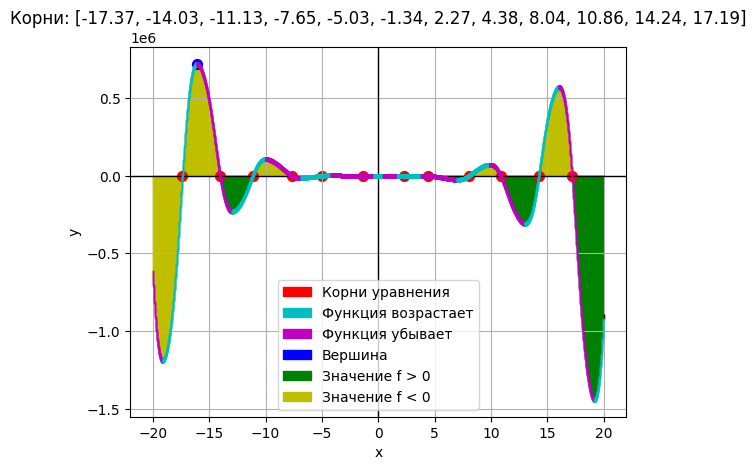

In [6]:
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
sign_changes = np.where(np.diff(np.sign(y)))[0]

for i in range(len(sign_changes)):
    if i == 0:
        start = 0
    else:
        start = sign_changes[i-1]
    stop = sign_changes[i]
    if y[start] > 0:
        plt.fill_between(x[start:stop], y[start:stop], color='g')
    else:
        plt.fill_between(x[start:stop], y[start:stop], color='y')
    if i == len(sign_changes)-1:
        start = sign_changes[i]
        stop = len(y)
        if y[start] > 0:
            plt.fill_between(x[start:stop], y[start:stop], color='g')
        else:
            plt.fill_between(x[start:stop], y[start:stop], color='y')
red_area = mpatches.Patch(color='y', label='Значение f < 0')
green_area = mpatches.Patch(color='g', label='Значение f > 0')
increase_range = []
decrease_range = []
for i in range(len(y) - 1):
    if y[i] < y[i+1]:
        increase_range.append(i)
    elif y[i] > y[i+1]:
        decrease_range.append(i)
for i in range(len(y)):
    if i in increase_range:
        plt.plot(x[i], y[i], '|', color='c', markersize=3)
    elif i in decrease_range:
        plt.plot(x[i], y[i], '|', color='m', markersize=3)
    else:
        plt.plot(x[i], y[i], '|', color='k', markersize=3)
decrease_line = mpatches.Patch(color='m', label='Функция убывает')
increase_line = mpatches.Patch(color='c', label='Функция возрастает')
for root_point in root_x:
    plt.scatter(root_point, f(root_point), s=50, color='r')
root_points = mpatches.Patch(color='r', label='Корни уравнения')
x_max_index = np.argmax(y)
x_max = x[x_max_index]
y_max = y[x_max_index]
plt.scatter(x_max, y_max, s=50, color='b')
head = mpatches.Patch(color='b', label='Вершина')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"Корни: {root_disp}")
plt.grid()
plt.legend(handles=[root_points, increase_line,decrease_line, head, green_area, red_area], loc='lower center')
plt.show()